### Import

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.datasets import boston_housing
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import History 
from keras import initializers
from keras import optimizers

## Load Data and Quick Check

In [2]:
#Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#Check
train.head(10)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [3]:
#Check Evaluation Data
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [4]:
#Check Shapes train/test
print(train.shape)
print(test.shape)

(333, 15)
(173, 14)


### Data Check, Preprocessing, Creating Validation Data

In [5]:
#Remove ID Variable
train.drop("ID", axis=1, inplace= True,errors= "ignore")

x_test =  test.drop("ID", axis=1,errors= "ignore")
y_train = train["medv"]
x_train = train.drop("medv", axis=1, errors= "ignore")


In [6]:
# Pandas to numpy array
x_test = x_test.as_matrix()
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()

#Splitting Data into Train/Valid
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33, random_state=39)


In [7]:
# Check Shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(223, 13)
(223,)
(110, 13)
(110,)
(173, 13)


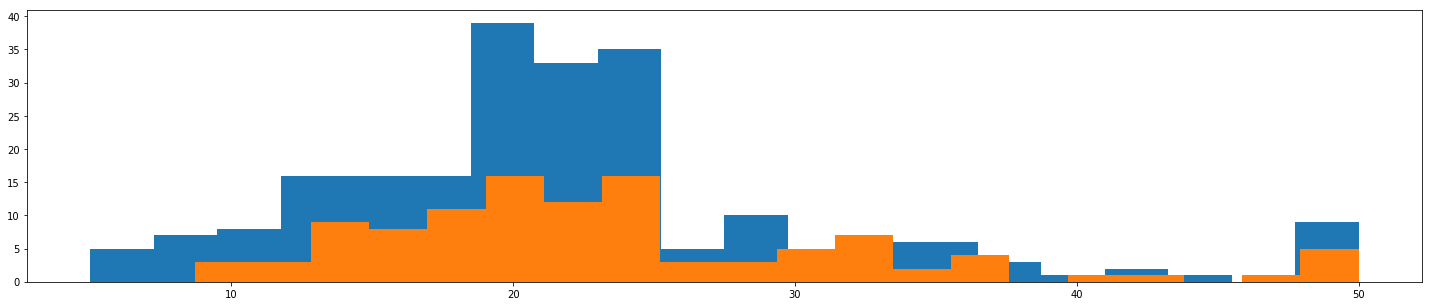

In [8]:
#Check Train/Valid datasets distributions
%matplotlib inline
x = np.arange(0, len(y_train),1)
plt.figure(figsize=(25, 5))
plt.hist(y_train,20)
plt.hist(y_valid,20)
plt.show()



## UDFs ##

In [9]:
#Define RMSE for loss 
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
    
# Get final Loss
def loss_eval(x_train, y_train, x_val, y_val, batch_size): 
    score_train = model.evaluate(x_train, y_train, batch_size=batch_size)
    score_valid  = model.evaluate(x_val, y_val, batch_size= batch_size)
    return score_train, score_valid


# Get Loss Timeline
def loss_epoch(history, y_lim_min, y_lim_max):
    hist = list(history.history.values())
    x = np.arange(0, len(hist[0]),1)
    plt.figure(figsize=(20, 5))
    plt.plot(x, hist[0], x, hist[1])
    plt.ylim([y_lim_min,y_lim_max])
    plt.show()

# Submit to CSV for desired kaggle Format

def to_kaggle_csv(origin_csv, x_predictions, filename):
    submit = origin_csv
    y_pred = model.predict(x_predictions)
    submit = submit.assign(medv = y_pred )
    test
    submit2 = submit[["ID", "medv"]]
    print(submit2.head())
    submit2.to_csv("submit.csv", sep=',', index= False)
    


## Optimizers to choose

In [10]:
sgd = optimizers.SGD(lr=0.0001, momentum=0.1, decay=0.0, nesterov=False, clipvalue=0.5)

#It is recommended to leave the parameters of this optimizer at their default values 
# (except the learning rate, which can be freely tuned).
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

#It is recommended to leave the parameters of this optimizer at their default values.
adagrad = optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

#Default parameters follow those provided in the original paper.
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

k_tnorm = initializers.TruncatedNormal(mean=0.0, stddev=0.2, seed=None)
k_runif = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

### Build Model and Compile

In [53]:

input1 = Input(shape=(13,))

# Build 3 stacks and concat afterwards
a = Dense(40, activation='relu')(input1)
a = Dropout(0.2)(a)
b = Dense(40, activation='sigmoid')(input1)
b = Dropout(0.2)(b)
c = Dense(40, activation='tanh')(input1)
c = Dropout(0.2)(c)

# Concate
x = keras.layers.concatenate([a, b, c ])
x = Dense(10, kernel_initializer = k_tnorm)(x)
output = Dense(1, kernel_initializer = k_tnorm)(x)

model = Model(inputs=[input1], outputs=[output])

model.compile(optimizer=adam ,loss=root_mean_squared_error)


### Train Model

In [54]:
history = History()
fit = model.fit(x_train, y_train,
                batch_size=16,
                epochs=500,
                verbose=0, callbacks=[history],
                validation_data =(x_valid, y_valid), shuffle = True
               )

## Evaluation of Train/Val Loss

110/110 [==============================] - 0sA: 0s
2.4206261699 2.87563896179


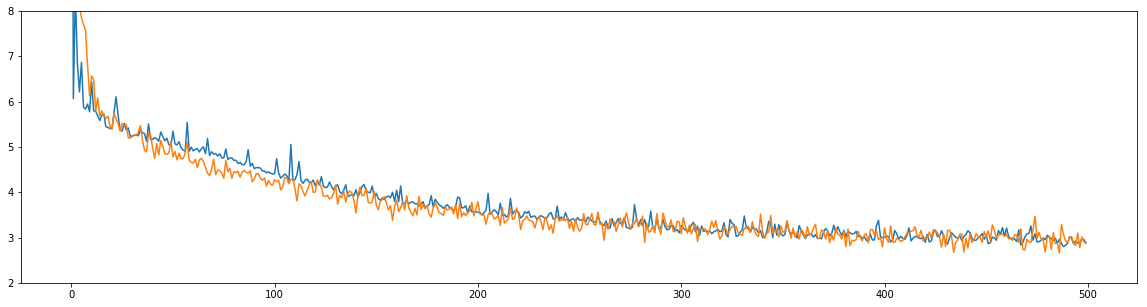

In [55]:
score_train, score_valid = loss_eval(x_train, y_train, x_valid, y_valid, 128)
print(score_train, score_valid)
loss_epoch(history,2,8)



## Check Fitting Errors , Visual

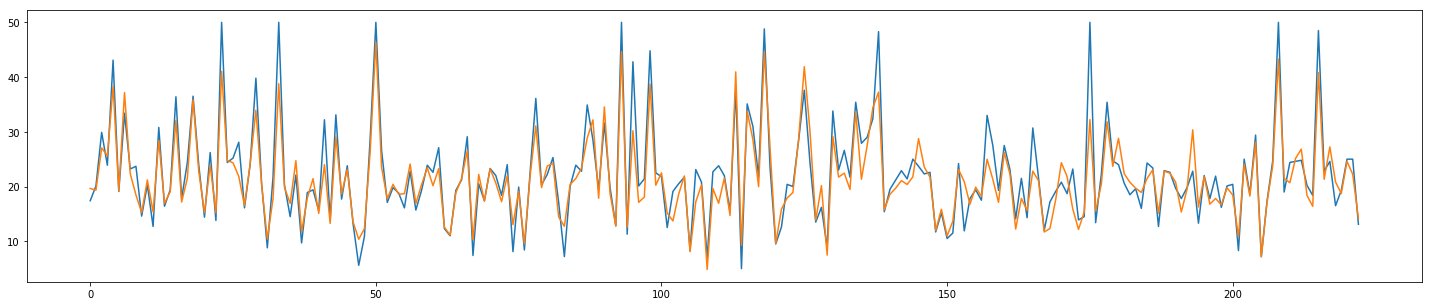

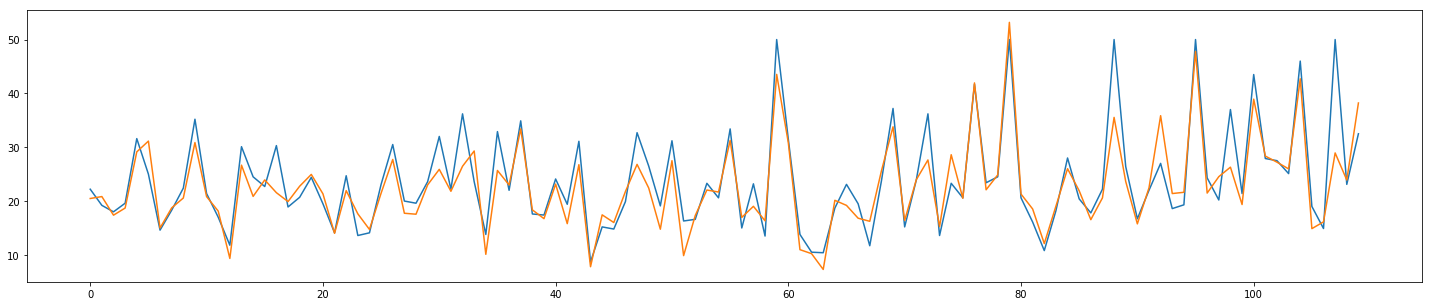

In [56]:
# It's not a Timeline, but you can see difference between y and yhat
# Fittness Train Data
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)


# Fittness Valid Data
x = np.arange(0, len(y_valid),1)
y_pred = model.predict(x_valid)
plt.figure(figsize=(25, 5))
plt.plot(x, y_valid, x , y_pred)

In [57]:
to_kaggle_csv(test, x_test, "submit.csv" )

   ID       medv
0   3  28.025999
1   6  26.985006
2   8  17.320839
3   9  16.108362
4  10  17.653833


## Extras

In [58]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

[]
[array([[ -1.68951064e-01,   6.67887256e-02,   6.78876936e-02,
         -2.27268636e-02,   1.52976573e-01,   1.00696659e+00,
          7.69385770e-02,   5.64243674e-01,  -1.59637615e-01,
          1.13249257e-01,  -2.25334182e-01,  -2.21849144e-01,
         -2.60621756e-01,  -8.27930748e-01,   1.45621687e-01,
          5.88614106e-01,  -6.28280699e-01,   2.33969949e-02,
         -5.11625469e-01,  -4.39058319e-02,   2.72945762e-01,
         -2.99338073e-01,  -6.08164370e-01,   2.99201876e-01,
          7.00607896e-02,  -2.58367628e-01,  -3.71264607e-01,
         -1.75039262e-01,  -1.08117640e-01,   1.77588269e-01,
          1.80955261e-01,   5.52212894e-01,  -3.77481312e-01,
          2.77580887e-01,  -3.41008246e-01,   2.95134503e-02,
         -7.00770497e-01,   3.12126368e-01,   1.22481756e-01,
          1.08714426e+00],
       [  7.46311713e-03,   7.75388479e-02,   7.99708292e-02,
         -3.27991992e-01,  -6.66221082e-02,  -9.36005592e-01,
          2.76583293e-03,  -2.12376773e